In [28]:
# !pip install pandas numpy matplotlib seaborn scipy
# !pip install sklearn

# !python -m pip --version
# !python -c "import sys,site; print(sys.executable); print(site.getsitepackages())"
# !python -m pip uninstall -y sklearn scikit-learn
# !python -m pip install --force-reinstall --no-deps matplotlib==3.10.0
# !python -m pip install -U matplotlib
# !python -m pip install -U pip setuptools wheel
# !python -m pip install -U scikit-learn
# !python -m pip check



In [97]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import RobustScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import RobustScaler 
from sklearn.impute import SimpleImputer 
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import RocCurveDisplay 
from sklearn.metrics import PrecisionRecallDisplay

import matplotlib.pyplot as plt 


In [98]:
DATA_PATH = r"D:/Archivos de Usuario/Documents/Machine_Learning/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"

telco_df = pd.read_csv(DATA_PATH)
telco_df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [102]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [105]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [106]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    """One-hot sobre columnas categóricas devolviendo DataFrame con nombres."""
    def __init__(self):
        self._oh = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        self._columns_out = None
        self._cat_cols = None

    def fit(self, X, y=None):
        self._cat_cols = list(X.columns)
        self._oh.fit(X)
        self._columns_out = list(self._oh.get_feature_names_out(self._cat_cols))
        return self

    def transform(self, X, y=None):
        arr = self._oh.transform(X)
        return pd.DataFrame(arr, columns=self._columns_out, index=X.index)

In [107]:
class CategoricalServiceCleaner(BaseEstimator, TransformerMixin):
    """
    En categóricas: 'No internet service'/'No phone service' -> 'No'
    para evitar dummies redundantes. Devuelve DataFrame.
    """
    def __init__(self):
        self._cols = None
    def fit(self, X, y=None):
        self._cols = list(X.columns)
        return self
    def transform(self, X, y=None):
        Xc = X.copy()
        for c in self._cols:
            Xc[c] = (Xc[c].astype(str).str.strip()
                     .replace({'No internet service': 'No', 'No phone service': 'No'}))
        return Xc

In [108]:
class NumericFeaturizer(BaseEstimator, TransformerMixin):
    """
    En numéricas:
      - Convierte TotalCharges a numérico (si existe).
      - (Opcional) añade interacción tenure*MonthlyCharges.
      - (Opcional) elimina TotalCharges (colinealidad).
    Todo ANTES de imputar y escalar. Devuelve DataFrame.
    """
    def __init__(self, add_interaction=True, drop_totalcharges=True):
        self.add_interaction = add_interaction
        self.drop_totalcharges = drop_totalcharges
        self._cols = None
    def fit(self, X, y=None):
        self._cols = list(X.columns)
        return self
    def transform(self, X, y=None):
        Xn = X.copy()
        if 'TotalCharges' in Xn.columns:
            Xn['TotalCharges'] = pd.to_numeric(Xn['TotalCharges'], errors='coerce')
        if self.add_interaction and set(['tenure','MonthlyCharges']).issubset(Xn.columns):
            Xn['tenure_x_monthly'] = Xn['tenure'] * Xn['MonthlyCharges']
        if self.drop_totalcharges and 'TotalCharges' in Xn.columns:
            Xn = Xn.drop(columns=['TotalCharges'])
        return Xn

In [110]:
class DataFramePreparer(BaseEstimator, TransformerMixin):
    """
    ColumnTransformer con:
      - num: NumericFeaturizer -> SimpleImputer(median) -> RobustScaler
      - cat: CategoricalServiceCleaner -> CustomOneHotEncoder
    Devuelve DataFrame con nombres de columnas.
    """
    def __init__(self, add_interaction=True, drop_totalcharges=True, drop_cols=None):
        self.add_interaction = add_interaction
        self.drop_totalcharges = drop_totalcharges
        self.drop_cols = drop_cols if drop_cols is not None else ['customerID']
        self._ct = None
        self._num_cols = None
        self._cat_cols = None
        self._columns_out = None

    def fit(self, X, y=None):
        # Excluir columnas no predictoras (ID) del set que verá el CT
        Xw = X.drop(columns=[c for c in self.drop_cols if c in X.columns], errors='ignore')

        # Detectar numéricas por dtype y añadir TotalCharges aunque sea object
        num_cols = list(Xw.select_dtypes(include=['int64','float64']).columns)
        if 'TotalCharges' in Xw.columns and 'TotalCharges' not in num_cols:
            num_cols.append('TotalCharges')
        self._num_cols = num_cols

        # Categóricas = resto
        self._cat_cols = [c for c in Xw.columns if c not in self._num_cols]

        num_pipeline = Pipeline([
            ('feats', NumericFeaturizer(add_interaction=self.add_interaction,
                                        drop_totalcharges=self.drop_totalcharges)),
            ('imputer', SimpleImputer(strategy="median")),
            ('rbst_scaler', RobustScaler())
        ])
        cat_pipeline = Pipeline([
            ('clean', CategoricalServiceCleaner()),
            ('oh_df', CustomOneHotEncoder())
        ])

        self._ct = ColumnTransformer([
            ("num", num_pipeline, self._num_cols),
            ("cat", cat_pipeline, self._cat_cols),
        ], remainder='drop')

        self._ct.fit(Xw)

        # --- Nombres de salida ---
        # num: partimos de las num detectadas y aplicamos la lógica del featurizer
        num_cols_out = list(self._num_cols)
        if self.add_interaction and 'tenure' in self._num_cols and 'MonthlyCharges' in self._num_cols:
            num_cols_out = num_cols_out + ['tenure_x_monthly']
        if self.drop_totalcharges and 'TotalCharges' in num_cols_out:
            num_cols_out.remove('TotalCharges')

        # cat: nombres del one-hot
        X_cat_clean = CategoricalServiceCleaner().fit(Xw[self._cat_cols]).transform(Xw[self._cat_cols])
        oh = CustomOneHotEncoder().fit(X_cat_clean)
        cat_cols_out = list(oh._columns_out)

        self._columns_out = num_cols_out + cat_cols_out
        return self

    def transform(self, X, y=None):
        Xw = X.drop(columns=[c for c in self.drop_cols if c in X.columns], errors='ignore')
        Xt = self._ct.transform(Xw)
        return pd.DataFrame(Xt, columns=self._columns_out, index=X.index)


In [111]:
DATA_PATH = r"D:/Archivos de Usuario/Documents/Machine_Learning/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

In [112]:
train_set, val_set, test_set = train_val_test_split(df, stratify='Churn', rstate=42)
X_train, y_train = train_set.drop(columns='Churn'), train_set['Churn'].copy()
X_val,   y_val   = val_set.drop(columns='Churn'),   val_set['Churn'].copy()
X_test,  y_test  = test_set.drop(columns='Churn'),  test_set['Churn'].copy()

print("Tamaños:")
print(" - Train:", X_train.shape, "| Churn=Yes ratio:", (y_train == 'Yes').mean())
print(" - Val  :", X_val.shape,   "| Churn=Yes ratio:", (y_val   == 'Yes').mean())
print(" - Test :", X_test.shape,  "| Churn=Yes ratio:", (y_test  == 'Yes').mean())

Tamaños:
 - Train: (4225, 20) | Churn=Yes ratio: 0.26532544378698225
 - Val  : (1409, 20) | Churn=Yes ratio: 0.2654364797728886
 - Test : (1409, 20) | Churn=Yes ratio: 0.2654364797728886


In [114]:
preparer = DataFramePreparer(add_interaction=True, drop_totalcharges=True, drop_cols=['customerID'])
preparer.fit(X_train)

X_train_prep = preparer.transform(X_train)
X_val_prep   = preparer.transform(X_val)
X_test_prep  = preparer.transform(X_test)

print("\nEjemplo columnas:", list(X_train_prep.columns)[:10])
print("Shapes -> Train:", X_train_prep.shape, " Val:", X_val_prep.shape, " Test:", X_test_prep.shape)


Ejemplo columnas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'tenure_x_monthly', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes']
Shapes -> Train: (4225, 38)  Val: (1409, 38)  Test: (1409, 38)


d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Archivos de Usuario\Documents\Machine_Learning\ai_env\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.w

In [115]:
# Config orientada a buen recall/F1 estable
clf = LogisticRegression(max_iter=5000, solver="saga", penalty="l2", C=2.0, class_weight="balanced")
clf.fit(X_train_prep, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,2.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'saga'
,max_iter,5000
,multi_class,'deprecated'


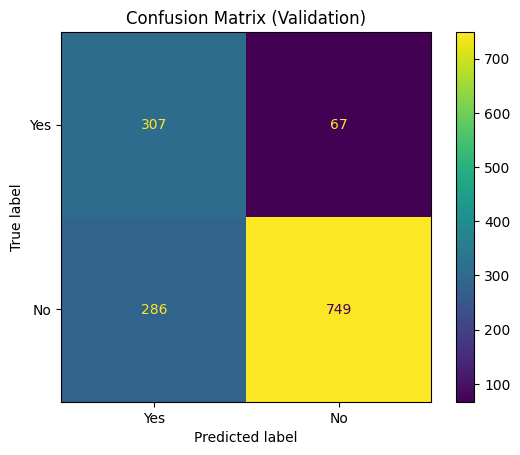

In [116]:
# VALIDACIÓN @0.5
y_val_pred = clf.predict(X_val_prep)
cm = confusion_matrix(y_val, y_val_pred, labels=['Yes','No'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Yes','No']).plot()
plt.title("Confusion Matrix (Validation)")
plt.show()

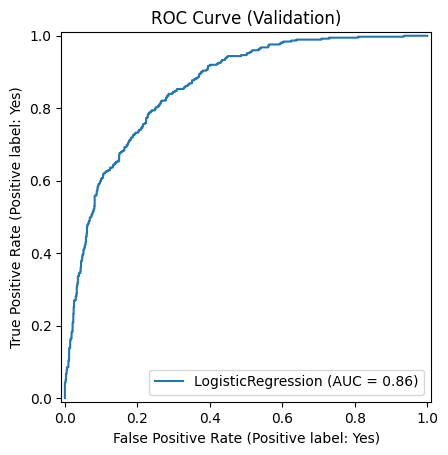

In [118]:
# Curvas
RocCurveDisplay.from_estimator(clf, X_val_prep, y_val)
plt.title("ROC Curve (Validation)")
plt.show()

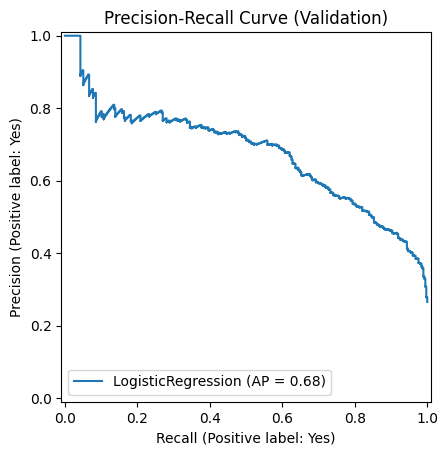

In [119]:
PrecisionRecallDisplay.from_estimator(clf, X_val_prep, y_val, pos_label='Yes')
plt.title("Precision-Recall Curve (Validation)")
plt.show()

In [120]:
def find_best_threshold_by_f1(y_true, y_proba, pos_label='Yes'):
    best_thr, best_f1 = 0.5, -1.0
    best_p, best_r = None, None
    for thr in np.linspace(0.0, 1.0, 201):
        y_hat = np.where(y_proba >= thr, 'Yes', 'No')
        f1 = f1_score(y_true, y_hat, pos_label=pos_label)
        if f1 > best_f1:
            best_f1 = f1; best_thr = thr
            best_p = precision_score(y_true, y_hat, pos_label=pos_label)
            best_r = recall_score(y_true, y_hat, pos_label=pos_label)
    return best_thr, best_f1, best_p, best_r

In [121]:
def find_threshold_by_recall(y_true, y_proba, target_recall=0.75, pos_label='Yes'):
    best_thr = 0.5; best_f1 = -1.0
    for thr in np.linspace(0.0, 1.0, 201):
        y_hat = np.where(y_proba >= thr, 'Yes', 'No')
        r = recall_score(y_true, y_hat, pos_label=pos_label)
        if r >= target_recall:
            f1 = f1_score(y_true, y_hat, pos_label=pos_label)
            if f1 > best_f1:
                best_f1 = f1; best_thr = thr
    return best_thr, best_f1

In [122]:
# Umbral por F1 (validación)
val_proba_yes = clf.predict_proba(X_val_prep)[:, list(clf.classes_).index('Yes')]
best_thr, best_f1, best_p, best_r = find_best_threshold_by_f1(y_val, val_proba_yes, pos_label='Yes')
print(f"\n[VAL] Best F1={best_f1:.3f} @ thr={best_thr:.3f} | P={best_p:.3f} | R={best_r:.3f}")



[VAL] Best F1=0.648 @ thr=0.565 | P=0.549 | R=0.789


In [123]:
# (Opcional) Umbral por objetivo de recall (validación)
target_recall = 0.75
thr_by_rec, f1_at_target = find_threshold_by_recall(y_val, val_proba_yes, target_recall=target_recall)
print(f"[VAL] Recall target={target_recall:.2f} -> thr={thr_by_rec:.3f}, F1={f1_at_target:.3f}")


[VAL] Recall target=0.75 -> thr=0.565, F1=0.648


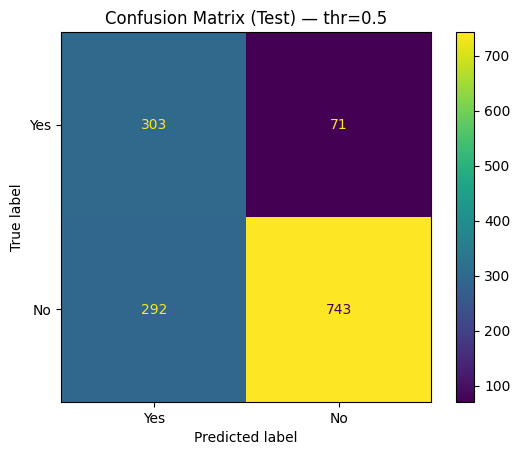


=== Test (thr=0.5) ===
Precision: 0.5092436974789916
Recall   : 0.8101604278074866
F1 score : 0.6253869969040248


In [124]:
# TEST @0.5
y_test_pred_05 = clf.predict(X_test_prep)
cm_test_05 = confusion_matrix(y_test, y_test_pred_05, labels=['Yes','No'])
ConfusionMatrixDisplay(confusion_matrix=cm_test_05, display_labels=['Yes','No']).plot()
plt.title("Confusion Matrix (Test) — thr=0.5")
plt.show()
print("\n=== Test (thr=0.5) ===")
print("Precision:", precision_score(y_test, y_test_pred_05, pos_label='Yes'))
print("Recall   :", recall_score(y_test, y_test_pred_05, pos_label='Yes'))
print("F1 score :", f1_score(y_test, y_test_pred_05, pos_label='Yes'))

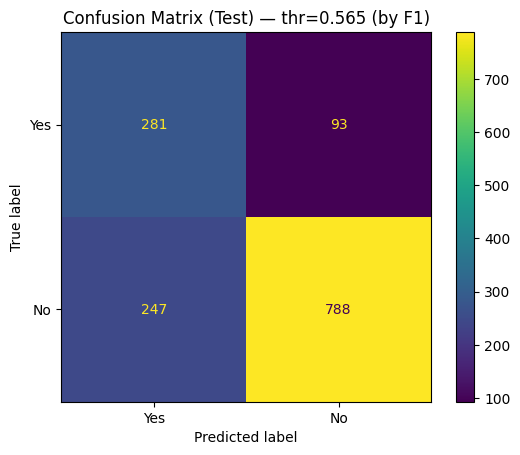


=== Test (thr=0.565) ===
Precision: 0.5321969696969697
Recall   : 0.7513368983957219
F1 score : 0.623059866962306


In [125]:
# TEST @best_thr (por F1)
test_proba_yes = clf.predict_proba(X_test_prep)[:, list(clf.classes_).index('Yes')]
y_test_pred_best = np.where(test_proba_yes >= best_thr, 'Yes', 'No')
cm_test_best = confusion_matrix(y_test, y_test_pred_best, labels=['Yes','No'])
ConfusionMatrixDisplay(confusion_matrix=cm_test_best, display_labels=['Yes','No']).plot()
plt.title(f"Confusion Matrix (Test) — thr={best_thr:.3f} (by F1)")
plt.show()
print(f"\n=== Test (thr={best_thr:.3f}) ===")
print("Precision:", precision_score(y_test, y_test_pred_best, pos_label='Yes'))
print("Recall   :", recall_score(y_test, y_test_pred_best, pos_label='Yes'))
print("F1 score :", f1_score(y_test, y_test_pred_best, pos_label='Yes'))

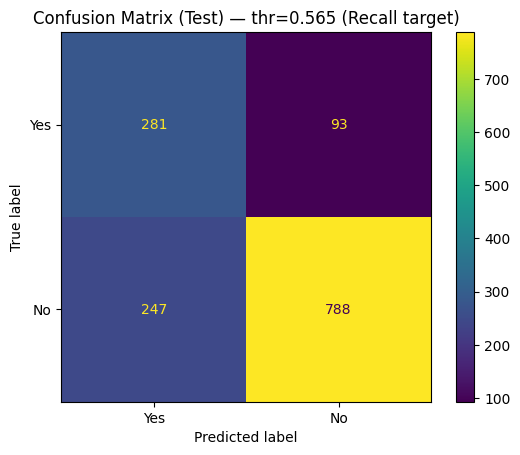


=== Test (thr=0.565 — Recall target=0.75) ===
Precision: 0.5321969696969697
Recall   : 0.7513368983957219
F1 score : 0.623059866962306


In [126]:
# TEST @thr_by_rec (por objetivo de Recall) — si lo usas
y_test_pred_rec = np.where(test_proba_yes >= thr_by_rec, 'Yes', 'No')
cm_test_rec = confusion_matrix(y_test, y_test_pred_rec, labels=['Yes','No'])
ConfusionMatrixDisplay(confusion_matrix=cm_test_rec, display_labels=['Yes','No']).plot()
plt.title(f"Confusion Matrix (Test) — thr={thr_by_rec:.3f} (Recall target)")
plt.show()
print(f"\n=== Test (thr={thr_by_rec:.3f} — Recall target={target_recall:.2f}) ===")
print("Precision:", precision_score(y_test, y_test_pred_rec, pos_label='Yes'))
print("Recall   :", recall_score(y_test, y_test_pred_rec, pos_label='Yes'))
print("F1 score :", f1_score(y_test, y_test_pred_rec, pos_label='Yes'))